In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,KFold
import warnings

In [2]:
df=pd.read_csv('product_data.csv')
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [3]:
df.shape

(101335, 7)

In [4]:
df.columns

Index(['order_item_id', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [5]:
df.isnull().sum()

order_item_id           0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_item_id         101335 non-null  int64  
 1   price                 101335 non-null  float64
 2   freight_value         101335 non-null  float64
 3   payment_sequential    101335 non-null  int64  
 4   payment_type          101335 non-null  int64  
 5   payment_installments  101335 non-null  int64  
 6   payment_value         101335 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 5.4 MB


In [7]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
count,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000
mean,1.205280,79.818332,16.126716,1.089495,1.352040,2.671703,124.124508
std,0.715244,56.057932,5.943237,0.689100,0.652362,2.524321,124.418064
min,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,35.990000,12.690000,1.000000,1.000000,1.000000,55.550000
50%,1.000000,63.900000,15.470000,1.000000,1.000000,1.000000,95.400000
75%,1.000000,109.900000,18.670000,1.000000,2.000000,3.000000,155.840000
max,21.000000,270.000000,36.000000,26.000000,4.000000,24.000000,3195.730000


In [8]:
df.dtypes

order_item_id             int64
price                   float64
freight_value           float64
payment_sequential        int64
payment_type              int64
payment_installments      int64
payment_value           float64
dtype: object

<AxesSubplot:>

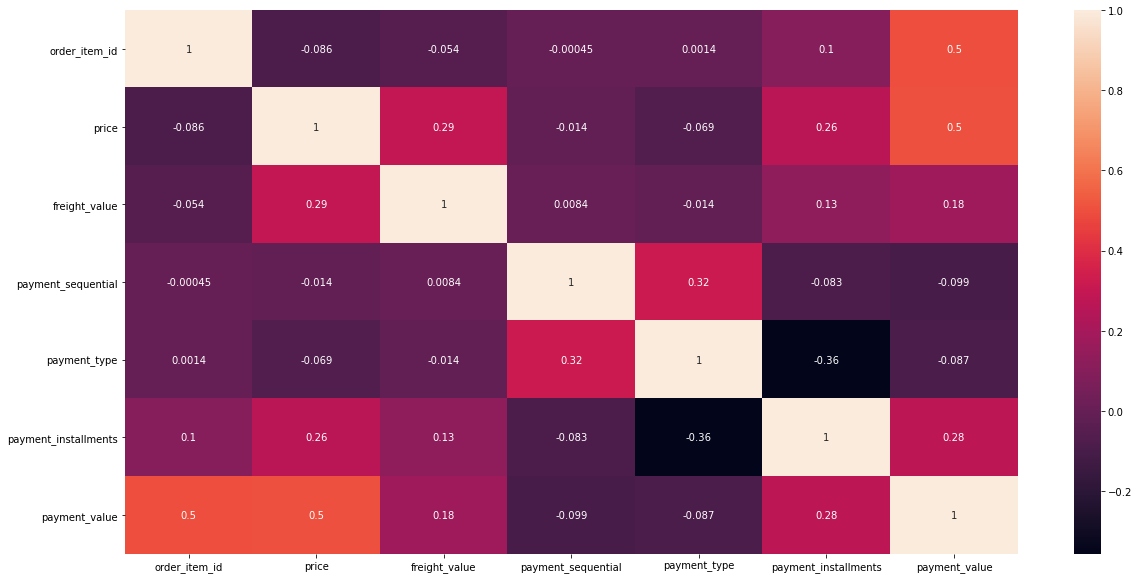

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Price'}, xlabel='price', ylabel='Density'>

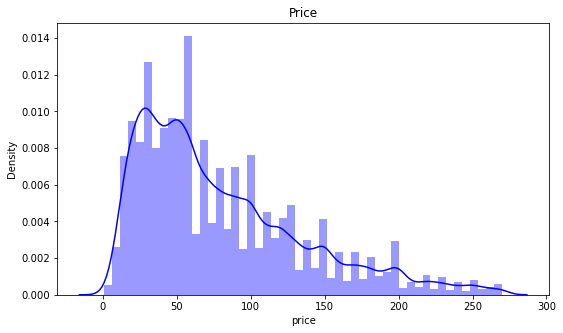

In [10]:
plt.figure(figsize=(30,5))
plt.subplot(1, 3, 1)
plt.title('Price')
sns.distplot(df['price'],color='blue')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Freight Value'}, xlabel='freight_value', ylabel='Density'>

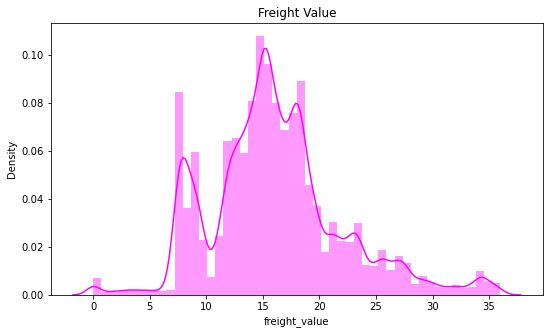

In [11]:
plt.figure(figsize=(30,5))
plt.subplot(1, 3, 2)
plt.title('Freight Value')
sns.distplot(df['freight_value'],color='magenta')

In [12]:
df['payment_sequential'].value_counts()

1     97070
2      2856
3       563
4       271
5       153
6       103
7        70
8        48
9        39
10       33
11       28
12       21
13       13
14       10
15        9
16        8
17        8
18        8
19        8
20        5
21        5
22        2
23        1
24        1
25        1
26        1
Name: payment_sequential, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Payment Sequential'}, xlabel='payment_sequential', ylabel='count'>

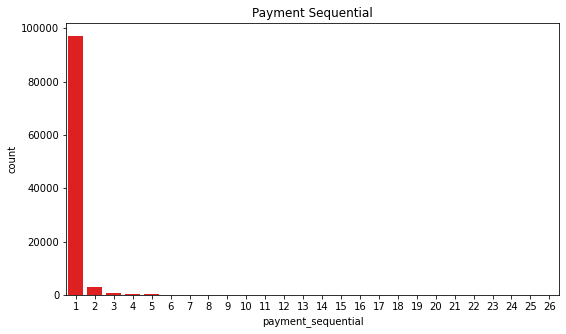

In [13]:
plt.figure(figsize=(30,5))
plt.subplot(1, 3, 3)
plt.title('Payment Sequential')
sns.countplot(df['payment_sequential'],color='red')

In [14]:
df['payment_type'].value_counts()

1    74164
2    20170
3     5499
4     1502
Name: payment_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Payment Type'}, xlabel='payment_type', ylabel='count'>

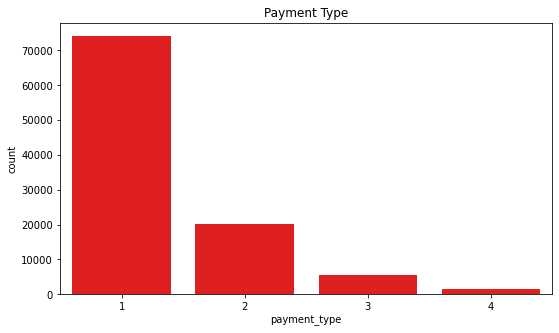

In [15]:
plt.figure(figsize=(30,5))
plt.subplot(1, 3, 3)
plt.title('Payment Type')
sns.countplot(df['payment_type'],color='red')

In [16]:
df['payment_installments'].value_counts()

1     53326
2     12475
3     10340
4      6816
5      4943
10     4121
6      3577
8      3400
7      1482
9       573
12      106
15       53
11       24
18       23
24       19
13       16
14       13
16        6
17        6
20        6
21        5
0         3
22        1
23        1
Name: payment_installments, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Payment Installments'}, xlabel='payment_installments', ylabel='count'>

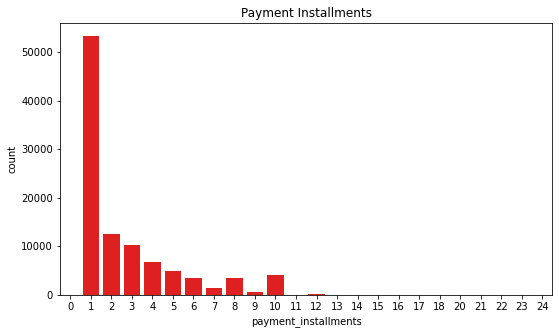

In [17]:
plt.figure(figsize=(30,5))
plt.subplot(1, 3, 3)
plt.title('Payment Installments')
sns.countplot(df['payment_installments'],color='red')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Payment Value'}, xlabel='payment_value', ylabel='Density'>

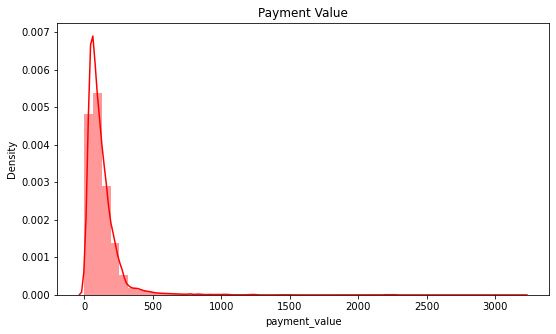

In [18]:
plt.figure(figsize=(30,5))
plt.subplot(1, 3, 2)
plt.title('Payment Value')
sns.distplot(df['payment_value'],color='red')

<Figure size 720x360 with 0 Axes>

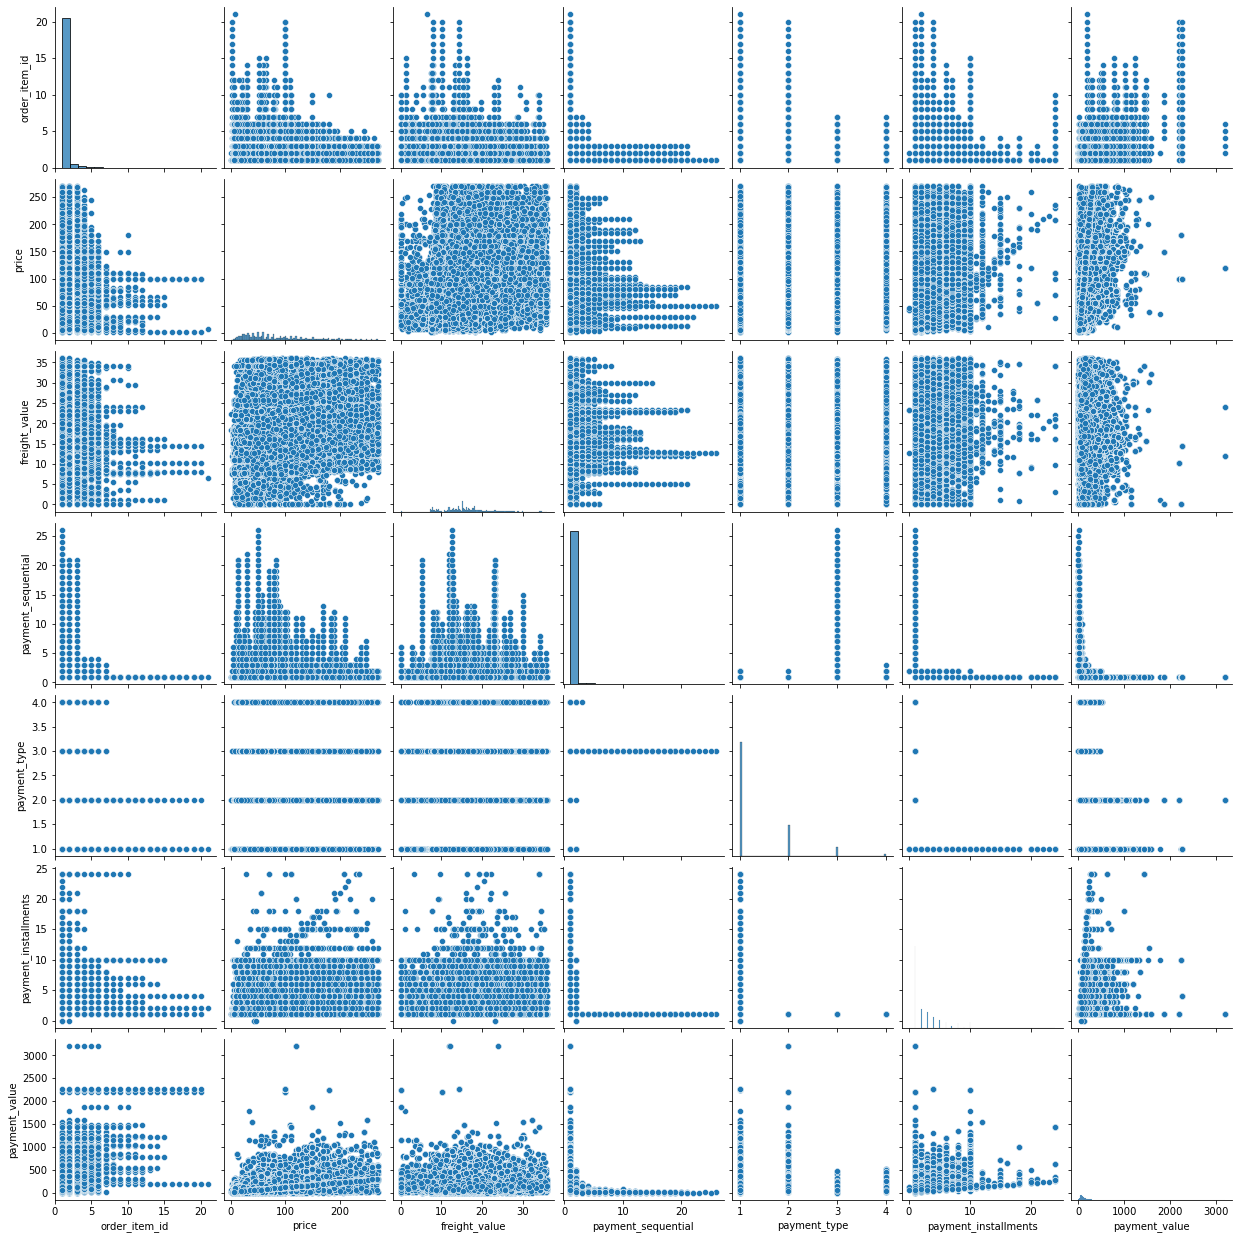

In [19]:
plt.figure(figsize=(10,5))
sns.pairplot(df)

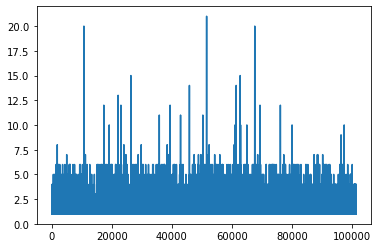

In [20]:
plt.plot(df['order_item_id'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='freight_value'>

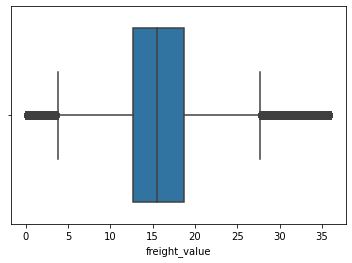

In [21]:
sns.boxplot(df['freight_value'])

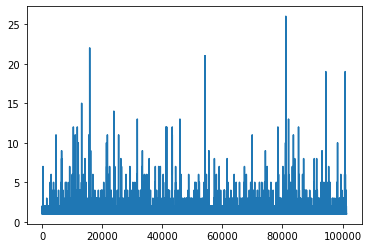

In [22]:
plt.plot(df['payment_sequential'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_type'>

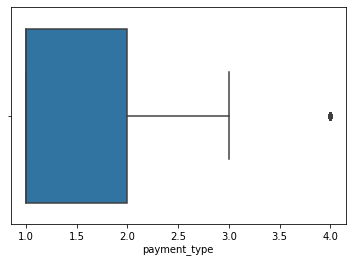

In [23]:
sns.boxplot(df['payment_type'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_installments'>

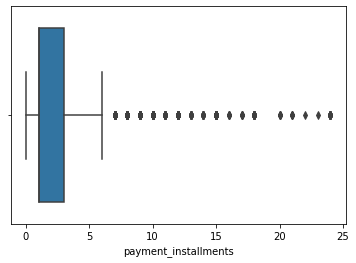

In [24]:
sns.boxplot(df['payment_installments'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_value'>

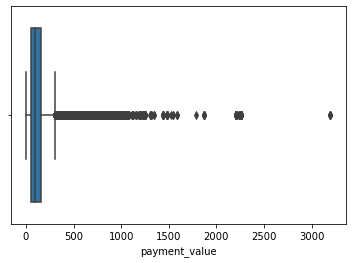

In [25]:
sns.boxplot(df['payment_value'])

## Splitting the data into train and test

In [26]:
df1=df

In [27]:
X=df1.drop('price',axis=1)
y=df1['price']

In [28]:
X.head()

,order_item_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,13.29,1,1,2,72.19
1,1,19.93,1,1,3,259.83
2,1,17.87,1,1,5,216.87
3,1,12.79,1,1,2,25.78
4,1,18.14,1,1,3,218.04


In [29]:
y.head()

0     58.90
1    239.90
2    199.00
3     12.99
4    199.90
Name: price, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (70934, 6)
X_test shape is  (30401, 6)
y_train shape is  (70934,)
y_test shape is  (30401,)


# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
k  = KFold(n_splits=5,shuffle=True, random_state=10)

In [33]:
lin_reg=LinearRegression()

In [34]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [35]:
lin_reg.coef_

array([-34.19746858,   1.24652206,   4.65354442,   1.24487129,
         2.59772629,   0.30210647])

In [36]:
print('Training score of Linear Regression model is ',lin_reg.score(X_train, y_train)*100,'percent')

Training score of Linear Regression model is  44.306911755259236 percent


In [37]:
print('Training score of Linear Regression model is ',lin_reg.score(X_test, y_test)*100,'percent')

Training score of Linear Regression model is  42.4166082404545 percent


In [38]:
lin_reg_R2_score = cross_val_score(lin_reg,X,y,cv=k,scoring='r2').mean()
lin_reg_R2_score

0.4367202544129073

In [39]:
y_pred_lin_reg=lin_reg.predict(X_train)

In [40]:
lin_reg.train=lin_reg.score(X_train, y_train)
lin_reg.test=lin_reg.score(X_test, y_test)
lin_reg.rmse=np.sqrt(mean_squared_error(y_train, y_pred_lin_reg))
lin_reg.mae=mean_absolute_error(y_train, y_pred_lin_reg)
score_df=pd.DataFrame({'Model':['Linear Regression'],'r2_score':lin_reg_R2_score,'Training score':lin_reg.train,'Test score':lin_reg.test,
                       'RMSE':lin_reg.rmse,'MAE':lin_reg.mae})
score_df

,Model,r2_score,Training score,Test score,RMSE,MAE
0,Linear Regression,0.43672,0.443069,0.424166,41.865043,30.557327


## Adding interaction terms - polynomial featres

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred_poly = poly_clf.predict(X_test2)

print(y_pred_poly)

[53.79063343 71.95917856 62.96148748 ... 82.98542215 97.85509785
 74.49740952]


In [42]:
print('Training score of Lin. Reg. model with Polynomial features is ', poly_clf.score(X_train2, y_train)*100,'percent')
print('Test score of Lin. Reg. model with Polynomial features is ', poly_clf.score(X_test2, y_test)*100,'percent')

Training score of Lin. Reg. model with Polynomial features is  49.26239283797281 percent
Test score of Lin. Reg. model with Polynomial features is  47.970002410743405 percent


In [43]:
print(X_train.shape)
print(X_train2.shape)

(70934, 6)
(70934, 22)


## kNN Regressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
knn_reg=knn_reg.fit(X_train,y_train)
pred_labels=knn_reg.predict(X_test)
print('kNN Regressor Training Score is',knn_reg.score(X_train,y_train)*100,'percent')
print('kNN Regressor Test Score is',knn_reg.score(X_test,y_test)*100,'percent')

kNN Regressor Training Score is 83.47972496935347 percent
kNN Regressor Test Score is 73.54685633649846 percent


In [45]:
pred_knn=knn_reg.predict(X_train)
knn_test_score=knn_reg.score(X_test,y_test)

In [46]:
knn_reg_R2_score = cross_val_score(knn_reg,X,y,cv=k,scoring='r2').mean()
knn_reg_R2_score

0.7464852521899262

In [47]:
knn_reg.score=r2_score(y_train,pred_knn)
knn_reg.rmse=np.sqrt(mean_squared_error(y_train, pred_knn))
knn_reg.mse=mean_squared_error(y_train, pred_knn)
knn_reg.mae=mean_absolute_error(y_train, pred_knn)

knn_regdf=pd.DataFrame({'Model':['knn'],'r2_score':knn_reg_R2_score,'Training score':knn_reg.score,'Test score':knn_test_score,
                       'RMSE':knn_reg.rmse,'MAE':knn_reg.mae})
score_df = pd.concat([score_df, knn_regdf])

In [48]:
score_df

,Model,r2_score,Training score,Test score,RMSE,MAE
0,Linear Regression,0.436720,0.443069,0.424166,41.865043,30.557327
0,knn,0.746485,0.834797,0.735469,22.801296,10.865980


# Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
dec_tree=DecisionTreeRegressor()
dec_tree=dec_tree.fit(X_train,y_train)
print('Training score of Decision Tree Regressor model is ',dec_tree.score(X_train, y_train)*100,'percent')
print('Test score of Decision Tree Regressor model is ',dec_tree.score(X_test, y_test)*100,'percent')

Training score of Decision Tree Regressor model is  99.98468969271389 percent
Test score of Decision Tree Regressor model is  68.4269191955401 percent


In [56]:
dec_train=dec_tree.score(X_train, y_train)
dec_test=dec_tree.score(X_test, y_test)
y_preddec=dec_tree.predict(X_train)

In [57]:
dec_tree_R2_score = cross_val_score(dec_tree,X,y,cv=k,scoring='r2').mean()
dec_tree_R2_score

0.6941418362597922

## Regularization of Decision Tree

In [60]:
dec_tree2 = DecisionTreeRegressor(criterion = 'mse', max_depth = 10, random_state=18)
dec_tree2=dec_tree2.fit(X_train, y_train)

In [61]:
print('Training score of Regularized Decision Tree Regressor model  is ',dec_tree2.score(X_train, y_train)*100,'percent')
print('Test score of Regularized Decision Tree Regressor model is ',dec_tree2.score(X_test, y_test)*100,'percent')

Training score of Regularized Decision Tree Regressor model  is  80.51554043196298 percent
Test score of Regularized Decision Tree Regressor model is  75.53551991091136 percent


In [62]:
dec_tree2_R2_score = cross_val_score(dec_tree2,X,y,cv=k,scoring='r2').mean()
dec_tree2_R2_score

0.7694911950382208

In [63]:
dec_train2=dec_tree2.score(X_train, y_train)
dec_test2=dec_tree2.score(X_test, y_test)
y_preddec2=dec_tree2.predict(X_train)

In [64]:
dt_rmse2=np.sqrt(mean_squared_error(y_train, y_preddec2))
dt_mae2=mean_absolute_error(y_train, y_preddec2)

In [65]:
dt_df=pd.DataFrame({'Model':['Decision Tree'],'r2_score':dec_tree2_R2_score,'Training score':dec_train,'Test score':dec_test,
                       'RMSE':dt_rmse2,'MAE':dt_mae2})

score_df=pd.concat([score_df,dt_df])
score_df

,Model,r2_score,Training score,Test score,RMSE,MAE
0,Linear Regression,0.436720,0.443069,0.424166,41.865043,30.557327
0,knn,0.746485,0.834797,0.735469,22.801296,10.865980
0,Decision Tree,0.769491,0.999847,0.684269,24.762534,12.923409


# Bagging Regressor

In [66]:
from sklearn.ensemble import BaggingRegressor
bag_reg=BaggingRegressor()
bag_reg=bag_reg.fit(X_train,y_train)
y_pred = bag_reg.predict(X_test)

In [67]:
print('Training score of Bagging Regressor model is ',bag_reg.score(X_train,y_train)*100,'percent')
print('Test score of Bagging Regressor model is ',bag_reg.score(X_test,y_test)*100,'percent')

Training score of Bagging Regressor model is  96.53385523353715 percent
Test score of Bagging Regressor model is  79.35446132514706 percent


In [68]:
bag_reg_R2_score = cross_val_score(bag_reg,X,y,cv=k,scoring='r2').mean()
bag_reg_R2_score

0.8029097180798741

In [69]:
bag_train=bag_reg.score(X_train, y_train)
bag_test=bag_reg.score(X_test, y_test)
y_predbag=bag_reg.predict(X_train)
bag_rmse=np.sqrt(mean_squared_error(y_train, y_predbag))
bag_mae=mean_absolute_error(y_train, y_predbag)

In [70]:
bag_df=pd.DataFrame({'Model':['Bagging'],'r2_score':bag_reg_R2_score,'Training score':bag_train,'Test score':bag_test,
                       'RMSE':bag_rmse,'MAE':bag_mae})

score_df=pd.concat([score_df,bag_df])
score_df

,Model,r2_score,Training score,Test score,RMSE,MAE
0,Linear Regression,0.436720,0.443069,0.424166,41.865043,30.557327
0,knn,0.746485,0.834797,0.735469,22.801296,10.865980
0,Decision Tree,0.769491,0.999847,0.684269,24.762534,12.923409
0,Bagging,0.802910,0.965339,0.793545,10.444178,4.132074


# AdaBoost

In [71]:
from sklearn.ensemble import AdaBoostRegressor
ab_reg = AdaBoostRegressor(n_estimators=10, random_state=1)
ab_reg = ab_reg.fit(X_train, y_train)
y_predab = ab_reg.predict(X_test)

In [72]:
print('Training score of AdaBoost model is ',ab_reg.score(X_train,y_train)*100,'percent')
print('Test score of AdaBoost model is ',ab_reg.score(X_test,y_test)*100,'percent')

Training score of AdaBoost model is  64.03636418636547 percent
Test score of AdaBoost model is  62.90676684906871 percent


In [73]:
ab_reg_R2_score = cross_val_score(ab_reg,X,y,cv=k,scoring='r2').mean()
ab_reg_R2_score

0.6431654145251218

In [74]:
ada_train=ab_reg.score(X_train, y_train)
ada_test=ab_reg.score(X_test, y_test)

y_predada=ab_reg.predict(X_train)

ada_rmse=np.sqrt(mean_squared_error(y_train, y_predada))
ada_mae=mean_absolute_error(y_train, y_predada)

In [75]:
ada_df=pd.DataFrame({'Model':['AdaBoost'],'r2_score':ab_reg_R2_score,'Training score':ada_train,'Test score':ada_test,
                       'RMSE':ada_rmse,'MAE':ada_mae})

score_df=pd.concat([score_df,ada_df])
score_df

,Model,r2_score,Training score,Test score,RMSE,MAE
0,Linear Regression,0.436720,0.443069,0.424166,41.865043,30.557327
0,knn,0.746485,0.834797,0.735469,22.801296,10.865980
0,Decision Tree,0.769491,0.999847,0.684269,24.762534,12.923409
0,Bagging,0.802910,0.965339,0.793545,10.444178,4.132074
0,AdaBoost,0.643165,0.640364,0.629068,33.642069,25.243103


# Gradient Boost Regressor

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators = 50,random_state=1)
gb_reg = gb_reg.fit(X_train, y_train)

In [77]:
print('Training score of Gradient Boost model is ',gb_reg.score(X_train,y_train)*100,'percent')
print('Test score of Gradient Boost model is ',gb_reg.score(X_test,y_test)*100,'percent')

Training score of Gradient Boost model is  75.83371591915366 percent
Test score of Gradient Boost model is  74.38704592591606 percent


In [78]:
gb_reg_R2_score = cross_val_score(gb_reg,X,y,cv=k,scoring='r2').mean()
gb_reg_R2_score

0.7534381708142937

In [79]:
gd_train=gb_reg.score(X_train, y_train)
gd_test=gb_reg.score(X_test, y_test)

y_predgd=gb_reg.predict(X_train)


gd_rmse=np.sqrt(mean_squared_error(y_train, y_predgd))
gd_mae=mean_absolute_error(y_train, y_predgd)

In [80]:
gd_df=pd.DataFrame({'Model':['Gradient Boost'],'r2_score':gb_reg_R2_score,'Training score':gd_train,'Test score':gd_test,
                       'RMSE':gd_rmse,'MAE':gd_mae})

score_df=pd.concat([score_df,gd_df])
score_df

,Model,r2_score,Training score,Test score,RMSE,MAE
0,Linear Regression,0.436720,0.443069,0.424166,41.865043,30.557327
0,knn,0.746485,0.834797,0.735469,22.801296,10.865980
0,Decision Tree,0.769491,0.999847,0.684269,24.762534,12.923409
0,Bagging,0.802910,0.965339,0.793545,10.444178,4.132074
0,AdaBoost,0.643165,0.640364,0.629068,33.642069,25.243103
0,Gradient Boost,0.753438,0.758337,0.743870,27.577560,16.107066


# Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100,max_depth=10,min_samples_split=5)
rf_reg = rf_reg.fit(X_train, y_train)

In [82]:
print('Training score of Random Forest model is ',rf_reg.score(X_train, y_train)*100,'percent')
print('Test score of Random Forest model is ',rf_reg.score(X_test, y_test)*100,'percent')

Training score of Random Forest model is  81.47058429069025 percent
Test score of Random Forest model is  77.47780651519406 percent


In [83]:
rf_reg_R2_score = cross_val_score(rf_reg,X,y,cv=k,scoring='r2').mean()
rf_reg_R2_score

0.7842824093349575

In [84]:
rf_train=rf_reg.score(X_train, y_train)
rf_test=rf_reg.score(X_test, y_test)

y_predrf=rf_reg.predict(X_train)


rf_rmse=np.sqrt(mean_squared_error(y_train, y_predrf))
rf_mae=mean_absolute_error(y_train, y_predrf)

In [85]:
rf_df=pd.DataFrame({'Model':['Random Forest'],'r2_score':rf_reg_R2_score,'Training score':rf_train,'Test score':rf_test,
                       'RMSE':rf_rmse,'MAE':rf_mae})

score_df=pd.concat([score_df,rf_df])
score_df

,Model,r2_score,Training score,Test score,RMSE,MAE
0,Linear Regression,0.436720,0.443069,0.424166,41.865043,30.557327
0,knn,0.746485,0.834797,0.735469,22.801296,10.865980
0,Decision Tree,0.769491,0.999847,0.684269,24.762534,12.923409
0,Bagging,0.802910,0.965339,0.793545,10.444178,4.132074
0,AdaBoost,0.643165,0.640364,0.629068,33.642069,25.243103
0,Gradient Boost,0.753438,0.758337,0.743870,27.577560,16.107066
0,Random Forest,0.784282,0.814706,0.774778,24.148033,12.704534


# XGBoost

In [86]:
import xgboost as xg
xgb_reg = xg.XGBRegressor(objective ='reg:linear',n_estimators = 80, seed = 123)
xgb_reg = xgb_reg.fit(X_train, y_train)

[19:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [87]:
print('Training score of Random Forest model is ',xgb_reg.score(X_train, y_train)*100,'percent')
print('Test score of Random Forest model is ',xgb_reg.score(X_test, y_test)*100,'percent')

Training score of Random Forest model is  85.0721096257849 percent
Test score of Random Forest model is  80.29444984755409 percent


In [88]:
import warnings

In [89]:
xgb_reg_R2_score = cross_val_score(xgb_reg,X,y,cv=k,scoring='r2').mean()
#xgb_reg_R2_score

[19:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [90]:
xgb_reg_R2_score

0.8130119175377599

In [91]:
xgb_train=xgb_reg.score(X_train, y_train)
xgb_test=xgb_reg.score(X_test, y_test)

y_predxgb=xgb_reg.predict(X_train)


xgb_rmse=np.sqrt(mean_squared_error(y_train, y_predxgb))
xgb_mae=mean_absolute_error(y_train, y_predxgb)

In [92]:
xgb_df=pd.DataFrame({'Model':['XGBoost'],'r2_score':xgb_reg_R2_score,'Training score':xgb_train,'Test score':xgb_test,
                       'RMSE':xgb_rmse,'MAE':xgb_mae})

score_df=pd.concat([score_df,xgb_df])
score_df

,Model,r2_score,Training score,Test score,RMSE,MAE
0,Linear Regression,0.436720,0.443069,0.424166,41.865043,30.557327
0,knn,0.746485,0.834797,0.735469,22.801296,10.865980
0,Decision Tree,0.769491,0.999847,0.684269,24.762534,12.923409
0,Bagging,0.802910,0.965339,0.793545,10.444178,4.132074
0,AdaBoost,0.643165,0.640364,0.629068,33.642069,25.243103
0,Gradient Boost,0.753438,0.758337,0.743870,27.577560,16.107066
0,Random Forest,0.784282,0.814706,0.774778,24.148033,12.704534
0,XGBoost,0.813012,0.850721,0.802944,21.674551,11.282650


Upon comparing various metrics, we can choose XGBoost as optimal model for the given dataset

In [93]:
import pickle
model_name='Z-Shoes-XGBoost.pkl'
with open(model_name,'wb') as file:
    pickle.dump(xgb_reg,file)

In [94]:
model_name='Z-Shoes-XGBoost.pkl'
with open(model_name,'rb') as file:
    XGB_model=pickle.load(file)

In [95]:
XGB_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=80, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)